In [1]:
!uv sync --quiet
import torch
from pytorch_semifield_conv import QuadraticKernelIso2D, QuadraticKernelSpectral2D, QuadraticKernelCholesky2D
import matplotlib.pyplot as plt

In [2]:
plt.rc("figure", dpi=200)

Variances (s): [[ 1.       13.249999 25.5      37.75     50.000004]]


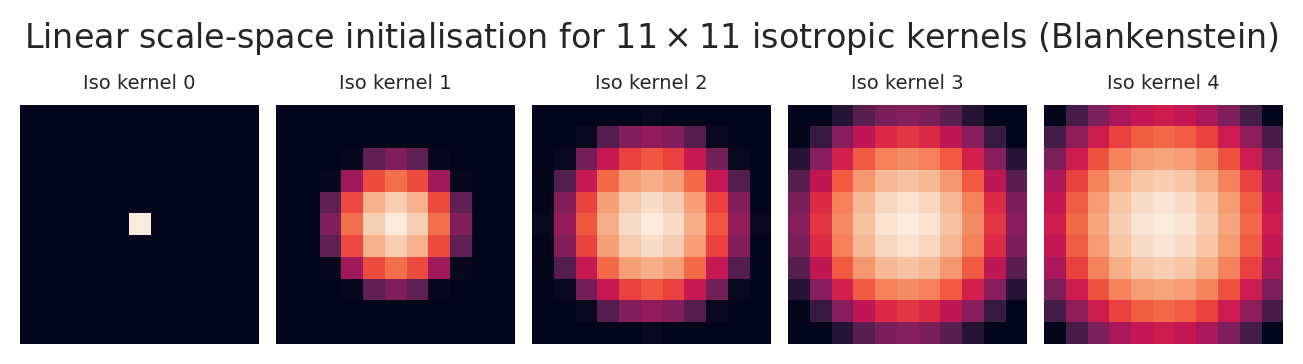

In [3]:
k = QuadraticKernelIso2D(5, 1, 11, {"var": "ss"})
k.log_std = torch.nn.Parameter(k.log_std.sort().values)
print("Variances (s):", k.log_std.mul(2).exp().numpy(force=True))
k.plot()
plt.suptitle(r"Linear scale-space initialisation for $11\times 11$ isotropic kernels (Blankenstein)")
for i, ax in enumerate(plt.gcf().axes):
    ax.set_title(f"Iso kernel {i}", fontdict={"size": 7})
plt.show()

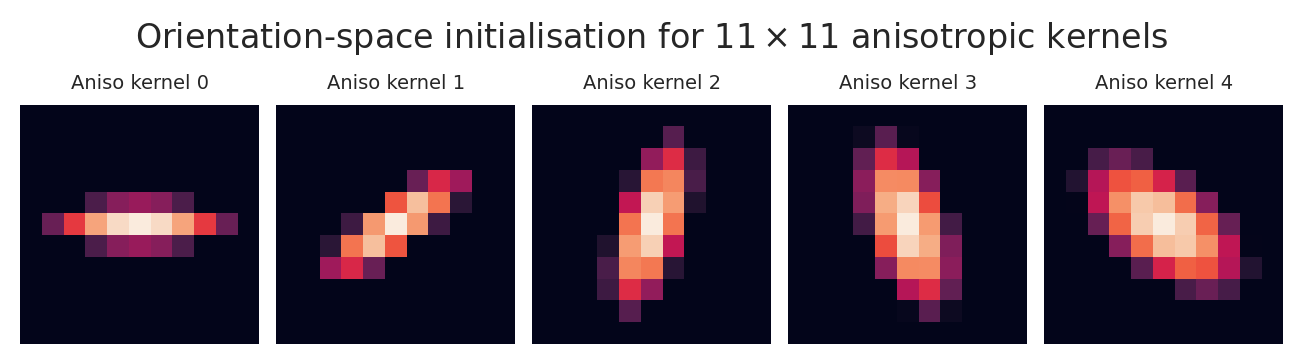

In [4]:
torch.manual_seed(0)
k = QuadraticKernelSpectral2D(5, 1, 11, {"var": "skewed", "theta": "spin"})
k.covs.log_std = torch.nn.Parameter(k.covs.log_std.sort(dim=1).values)
k.covs.theta = torch.nn.Parameter(k.covs.theta.sort().values)
k.plot()
plt.suptitle(r"Orientation-space initialisation for $11\times11$ anisotropic kernels")
for i, ax in enumerate(plt.gcf().axes):
    ax.set_title(f"Aniso kernel {i}", fontdict={"size": 7})
plt.show()

Variances (s): [[ 1.         2.659148   7.0710673 18.803015  49.999992 ]]


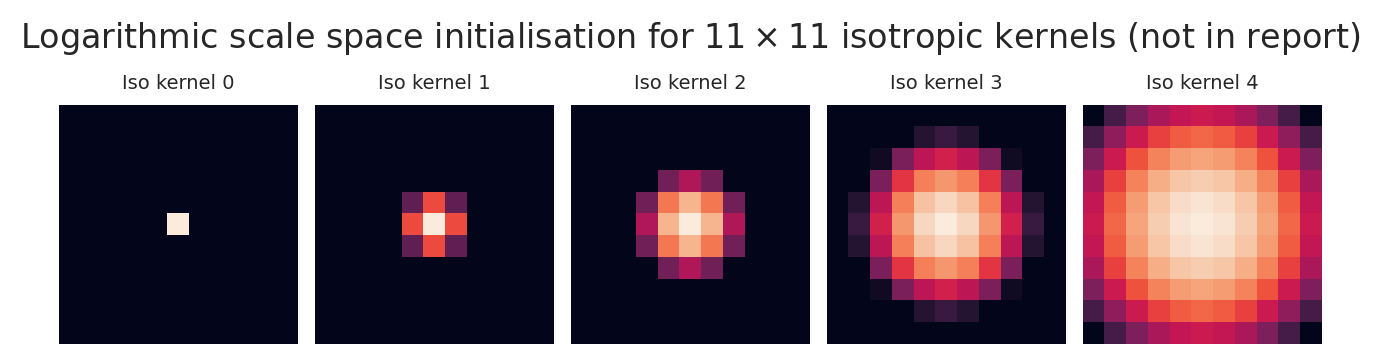

In [5]:
k = QuadraticKernelIso2D(5, 1, 11, {"var": "log-ss"})
k.log_std = torch.nn.Parameter(k.log_std.sort().values)
print("Variances (s):", k.log_std.mul(2).exp().numpy(force=True))
k.plot()
plt.suptitle(r"Logarithmic scale space initialisation for $11\times 11$ isotropic kernels (not in report)")
for i, ax in enumerate(plt.gcf().axes):
    ax.set_title(f"Iso kernel {i}", fontdict={"size": 7})
plt.show()

Variances (s): [ 1.       13.249999 25.5      37.75     50.000004]


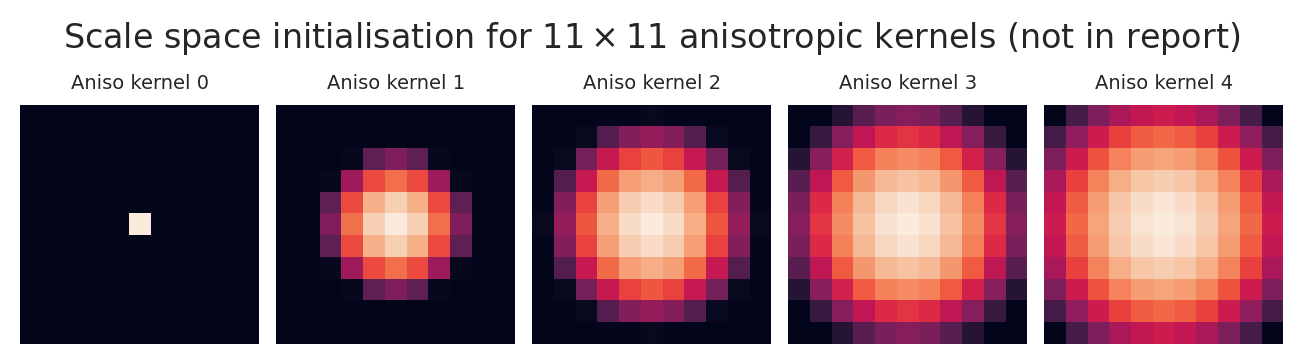

In [6]:
torch.manual_seed(0)
k = QuadraticKernelSpectral2D(5, 1, 11, {"var": "ss-iso", "theta": "spin"})
k.covs.log_std = torch.nn.Parameter(k.covs.log_std.sort(dim=1).values)
print("Variances (s):", k.covs.log_std[0, :, 0].mul(2).exp().numpy(force=True))
k.covs.theta = torch.nn.Parameter(k.covs.theta.sort().values)
k.plot()
plt.suptitle(r"Scale space initialisation for $11\times11$ anisotropic kernels (not in report)")
for i, ax in enumerate(plt.gcf().axes):
    ax.set_title(f"Aniso kernel {i}", fontdict={"size": 7})
plt.show()

Variances (s): [ 1.       13.249999 25.5      37.75     50.000004]


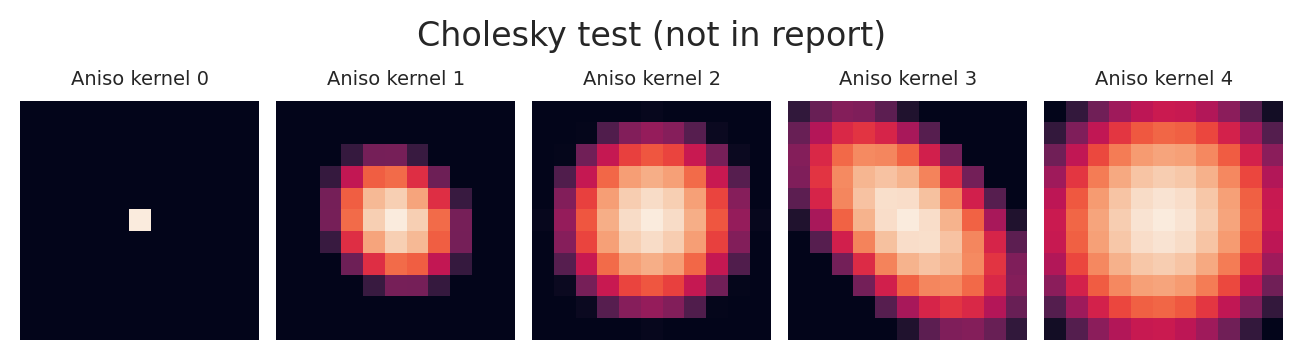

In [7]:
torch.manual_seed(0)
k = QuadraticKernelCholesky2D(5, 1, 11, {"var": "ss-iso"})
k.covs.log_std = torch.nn.Parameter(k.covs.log_std.sort(dim=2).values)
print("Variances (s):", k.covs.log_std[0, 0, :].mul(2).exp().numpy(force=True))
k.plot()
plt.suptitle(r"Cholesky test (not in report)")
for i, ax in enumerate(plt.gcf().axes):
    ax.set_title(f"Aniso kernel {i}", fontdict={"size": 7})
plt.show()